In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns #seaborn is used for the staic data visualization 

In [3]:
sns.set()

In [4]:
train_data = pd.read_excel(r"~\Documents\Data_Train.xlsx")

In [5]:
pd.set_option('display.max_columns', None) #On printing the dataframe in Jupyter notebook pands will show all column of the Dataframe without any truncation

In [6]:
train_data.tail()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
12971,Yeti Airlines,6/10/2023,Kathmandu,Pokhara,KTM->SIM,9:00,9:30,30m,non-stop,In-flight meal not included,31.493701
12972,Yeti Airlines,31/12/2023,Kathmandu,Nepalgunj,KTM->NEP,9:10,10:05,55m,non-stop,In-flight meal not included,48.740252
12973,Yeti Airlines,1/10/2023,Biratnagar,Kathmandu,BIR->KTM,9:20,10:05,45m,non-stop,No Info,41.241752
12974,Yeti Airlines,25/10/2023,Kathmandu,Biratnagar,KTM->BIR,10:35,11:20,45m,non-stop,No Info,41.241752
12975,Yeti Airlines,26/09/2023,Simara,Kathmandu,SIM->KTM,7:30,7:50,20m,non-stop,No Info,25.944811


In [7]:
train_data["Duration"].value_counts()

2h 50m     550
25m        549
1h 30m     386
20m        371
2h 45m     337
          ... 
42h 5m       1
4h 10m       1
5m           1
33h 20m      1
35h 35m      1
Name: Duration, Length: 377, dtype: int64

In [8]:
train_data.dropna(inplace=True) #Used to remove rows with missing (NaN) values from the DataFrame train_data in-place

In [9]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [10]:
#Convert journy day to the specified format 
train_data["Journey_day"]=pd.to_datetime(train_data.Date_of_Journey,format ="%d/%m/%Y").dt.day
train_data["Journey_month"]=pd.to_datetime(train_data.Date_of_Journey,format="%d/%m/%Y").dt.month
train_data["Journey_year"] = pd.to_datetime(train_data["Date_of_Journey"], format="%d/%m/%Y").dt.year

train_data.tail()


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year
12971,Yeti Airlines,6/10/2023,Kathmandu,Pokhara,KTM->SIM,9:00,9:30,30m,non-stop,In-flight meal not included,31.493701,6,10,2023
12972,Yeti Airlines,31/12/2023,Kathmandu,Nepalgunj,KTM->NEP,9:10,10:05,55m,non-stop,In-flight meal not included,48.740252,31,12,2023
12973,Yeti Airlines,1/10/2023,Biratnagar,Kathmandu,BIR->KTM,9:20,10:05,45m,non-stop,No Info,41.241752,1,10,2023
12974,Yeti Airlines,25/10/2023,Kathmandu,Biratnagar,KTM->BIR,10:35,11:20,45m,non-stop,No Info,41.241752,25,10,2023
12975,Yeti Airlines,26/09/2023,Simara,Kathmandu,SIM->KTM,7:30,7:50,20m,non-stop,No Info,25.944811,26,9,2023


In [11]:
train_data.drop(["Date_of_Journey"], axis = 1, inplace = True)


In [12]:
train_data.tail()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year
12971,Yeti Airlines,Kathmandu,Pokhara,KTM->SIM,9:00,9:30,30m,non-stop,In-flight meal not included,31.493701,6,10,2023
12972,Yeti Airlines,Kathmandu,Nepalgunj,KTM->NEP,9:10,10:05,55m,non-stop,In-flight meal not included,48.740252,31,12,2023
12973,Yeti Airlines,Biratnagar,Kathmandu,BIR->KTM,9:20,10:05,45m,non-stop,No Info,41.241752,1,10,2023
12974,Yeti Airlines,Kathmandu,Biratnagar,KTM->BIR,10:35,11:20,45m,non-stop,No Info,41.241752,25,10,2023
12975,Yeti Airlines,Simara,Kathmandu,SIM->KTM,7:30,7:50,20m,non-stop,No Info,25.944811,26,9,2023


In [13]:
train_data["Dep_hour"] = pd.to_datetime(train_data["Dep_Time"]).dt.hour


In [14]:
train_data["Dep_min"] = pd.to_datetime(train_data["Dep_Time"]).dt.minute


In [15]:
train_data.drop(["Dep_Time"], axis = 1, inplace = True)

train_data.tail()


,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_hour,Dep_min
12971,Yeti Airlines,Kathmandu,Pokhara,KTM->SIM,9:30,30m,non-stop,In-flight meal not included,31.493701,6,10,2023,9,0
12972,Yeti Airlines,Kathmandu,Nepalgunj,KTM->NEP,10:05,55m,non-stop,In-flight meal not included,48.740252,31,12,2023,9,10
12973,Yeti Airlines,Biratnagar,Kathmandu,BIR->KTM,10:05,45m,non-stop,No Info,41.241752,1,10,2023,9,20
12974,Yeti Airlines,Kathmandu,Biratnagar,KTM->BIR,11:20,45m,non-stop,No Info,41.241752,25,10,2023,10,35
12975,Yeti Airlines,Simara,Kathmandu,SIM->KTM,7:50,20m,non-stop,No Info,25.944811,26,9,2023,7,30


In [16]:
train_data["Arrival_hour"] = pd.to_datetime(train_data.Arrival_Time).dt.hour


In [17]:
# Extracting Minutes
train_data["Arrival_min"] = pd.to_datetime(train_data.Arrival_Time).dt.minute


In [18]:
# Now we can drop Arrival_Time as it is of no use
train_data.drop(["Arrival_Time"], axis = 1, inplace = True)
train_data.tail()


,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_hour,Dep_min,Arrival_hour,Arrival_min
12971,Yeti Airlines,Kathmandu,Pokhara,KTM->SIM,30m,non-stop,In-flight meal not included,31.493701,6,10,2023,9,0,9,30
12972,Yeti Airlines,Kathmandu,Nepalgunj,KTM->NEP,55m,non-stop,In-flight meal not included,48.740252,31,12,2023,9,10,10,5
12973,Yeti Airlines,Biratnagar,Kathmandu,BIR->KTM,45m,non-stop,No Info,41.241752,1,10,2023,9,20,10,5
12974,Yeti Airlines,Kathmandu,Biratnagar,KTM->BIR,45m,non-stop,No Info,41.241752,25,10,2023,10,35,11,20
12975,Yeti Airlines,Simara,Kathmandu,SIM->KTM,20m,non-stop,No Info,25.944811,26,9,2023,7,30,7,50


In [19]:

duration = list(train_data["Duration"])


for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration
# Adding duration_hours and duration_mins list to train_data dataframe

train_data["Duration_hours"] = duration_hours
train_data["Duration_mins"] = duration_mins
train_data.drop(["Duration"], axis = 1, inplace = True)
train_data.tail()



,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
12971,Yeti Airlines,Kathmandu,Pokhara,KTM->SIM,non-stop,In-flight meal not included,31.493701,6,10,2023,9,0,9,30,0,30
12972,Yeti Airlines,Kathmandu,Nepalgunj,KTM->NEP,non-stop,In-flight meal not included,48.740252,31,12,2023,9,10,10,5,0,55
12973,Yeti Airlines,Biratnagar,Kathmandu,BIR->KTM,non-stop,No Info,41.241752,1,10,2023,9,20,10,5,0,45
12974,Yeti Airlines,Kathmandu,Biratnagar,KTM->BIR,non-stop,No Info,41.241752,25,10,2023,10,35,11,20,0,45
12975,Yeti Airlines,Simara,Kathmandu,SIM->KTM,non-stop,No Info,25.944811,26,9,2023,7,30,7,50,0,20


In [20]:

train_data["Airline"].value_counts()



Jet Airways          3849
IndiGo               2053
Air India            1751
Multiple carriers    1209
Buddha Air            999
SpiceJet              818
Yeti Airlines         700
Shree Airlines        601
Vistara               482
Air Asia              319
GoAir                 194
Name: Airline, dtype: int64

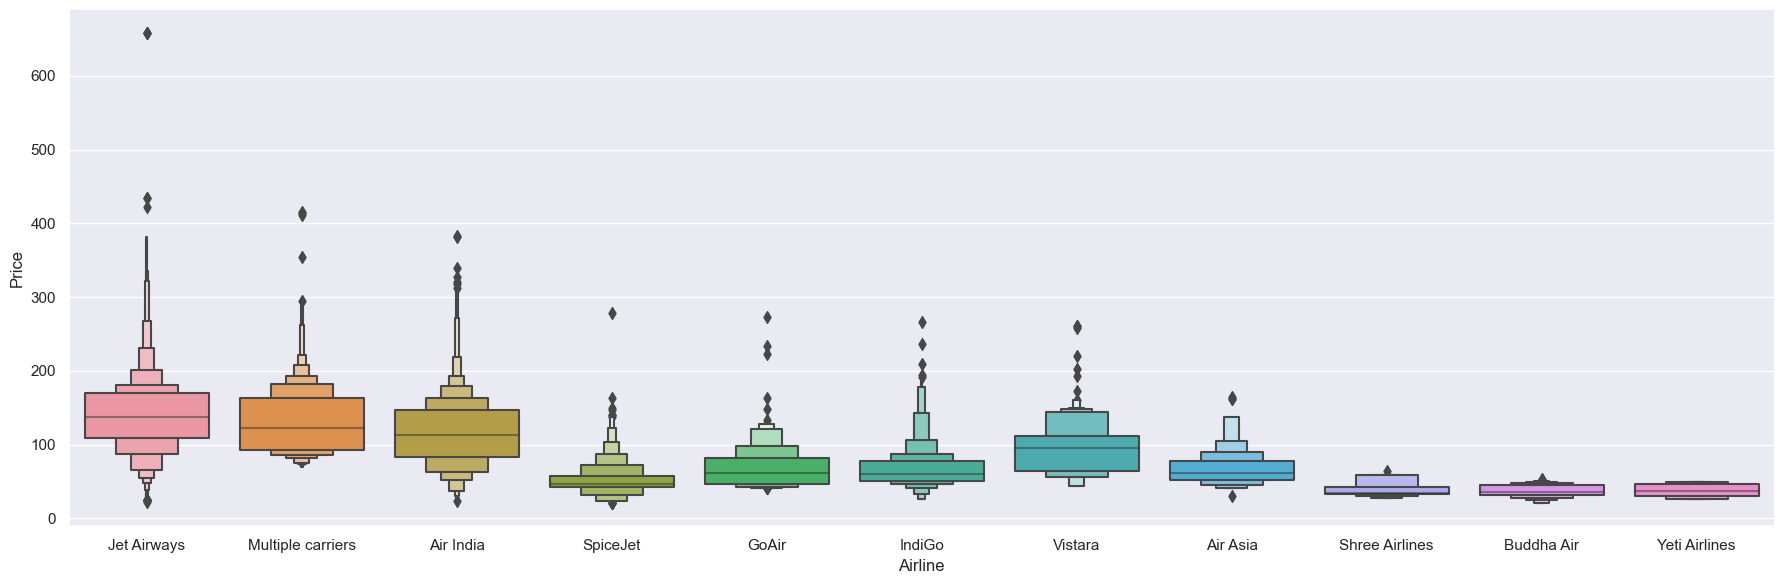

In [21]:
sns.catplot(y = "Price", x = "Airline", data = train_data.sort_values("Price", ascending = False), kind="boxen", height = 6, aspect = 3)
#here we make the box plot to visualise the relationship between the airline and prices 
# Box plot shows inter quartile range of the dataset
plt.show()


In [22]:
Airline = train_data[["Airline"]]
Airline.tail()

Airline = pd.get_dummies(Airline, drop_first= True)
#preforms onhot encoding to the airlines datas 


In [23]:
Airline.head()


,Airline_Air India,Airline_Buddha Air,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Multiple carriers,Airline_Shree Airlines,Airline_SpiceJet,Airline_Vistara,Airline_Yeti Airlines
0,0,0,0,1,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0


In [24]:
train_data["Source"].value_counts()

Delhi         4534
Kolkata       2871
Banglore      2193
Kathmandu     1079
Mumbai         696
Chennai        381
Biratnagar     215
Pokhara        182
Simara         165
Nepalgunj      154
Janakpur       146
Bhairahawa     105
Bharatpur       93
Bhadrapur       62
Rajbiraj        51
Dhangadi        48
Name: Source, dtype: int64

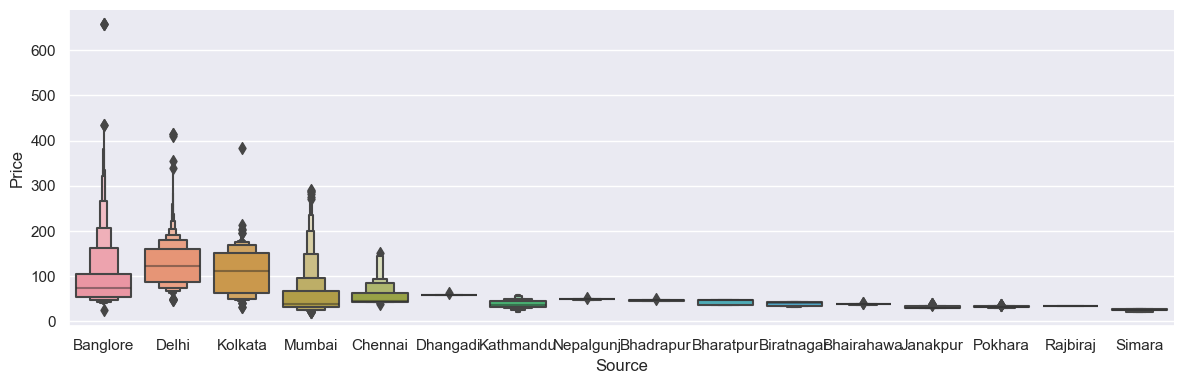

In [25]:
sns.catplot(y = "Price", x = "Source", data = train_data.sort_values("Price", ascending = False), kind="boxen", height = 4, aspect = 3)
plt.show()


In [26]:

Source = train_data[["Source"]]

Source = pd.get_dummies(Source, drop_first= True)

Source.head()
train_data["Destination"].value_counts()



Cochin        4534
Banglore      2871
Delhi         1265
Kathmandu     1221
New Delhi      928
Hyderabad      696
Kolkata        381
Biratnagar     198
Nepalgunj      146
Janakpur       142
Pokhara        139
Simara         129
Bhairahawa     120
Bharatpur       76
Bhadrapur       59
Rajbiraj        36
Dhangadi        34
Name: Destination, dtype: int64

In [27]:
# As Destination is Nominal Categorical data we will perform OneHotEncoding

Destination = train_data[["Destination"]]

Destination = pd.get_dummies(Destination, drop_first = True)

Destination.head()
train_data["Route"]

train_data.tail()




,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
12971,Yeti Airlines,Kathmandu,Pokhara,KTM->SIM,non-stop,In-flight meal not included,31.493701,6,10,2023,9,0,9,30,0,30
12972,Yeti Airlines,Kathmandu,Nepalgunj,KTM->NEP,non-stop,In-flight meal not included,48.740252,31,12,2023,9,10,10,5,0,55
12973,Yeti Airlines,Biratnagar,Kathmandu,BIR->KTM,non-stop,No Info,41.241752,1,10,2023,9,20,10,5,0,45
12974,Yeti Airlines,Kathmandu,Biratnagar,KTM->BIR,non-stop,No Info,41.241752,25,10,2023,10,35,11,20,0,45
12975,Yeti Airlines,Simara,Kathmandu,SIM->KTM,non-stop,No Info,25.944811,26,9,2023,7,30,7,50,0,20


In [28]:
# Additional_Info contains almost 80% no_info
# Route and Total_Stops are related to each other

#The removal of "Route" and "Additional_Info" columns have been done because "Route" can be quite detailed and lead to high dimensionality, and "Additional_Info" may not provide significant information for the analysis. The "Total_Stops" value counts give you an idea of the distribution of flights based on the number of stops they make, which is valuable information when working with flight data.

train_data.drop(["Route", "Additional_Info"], axis = 1, inplace = True)
train_data["Total_Stops"].value_counts()


train_data.tail()



,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Journey_year,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
12971,Yeti Airlines,Kathmandu,Pokhara,non-stop,31.493701,6,10,2023,9,0,9,30,0,30
12972,Yeti Airlines,Kathmandu,Nepalgunj,non-stop,48.740252,31,12,2023,9,10,10,5,0,55
12973,Yeti Airlines,Biratnagar,Kathmandu,non-stop,41.241752,1,10,2023,9,20,10,5,0,45
12974,Yeti Airlines,Kathmandu,Biratnagar,non-stop,41.241752,25,10,2023,10,35,11,20,0,45
12975,Yeti Airlines,Simara,Kathmandu,non-stop,25.944811,26,9,2023,7,30,7,50,0,20


In [29]:
# As this is case of Ordinal Categorical type we perform LabelEncoder
# Here Values are assigned with corresponding keys

train_data.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)
train_data.head()
# Concatenate dataframe --> train_data + Airline + Source + Destination


,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Journey_year,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,0,46.726619,24,3,2019,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,91.870504,1,5,2019,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,166.450839,9,6,2019,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,74.556355,12,5,2019,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,159.496403,1,3,2019,16,50,21,35,4,45


In [30]:

data_train = pd.concat([train_data, Airline, Source, Destination], axis = 1)
data_train.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True)
data_train.tail()


,Total_Stops,Price,Journey_day,Journey_month,Journey_year,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Airline_Air India,Airline_Buddha Air,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Multiple carriers,Airline_Shree Airlines,Airline_SpiceJet,Airline_Vistara,Airline_Yeti Airlines,Source_Bhadrapur,Source_Bhairahawa,Source_Bharatpur,Source_Biratnagar,Source_Chennai,Source_Delhi,Source_Dhangadi,Source_Janakpur,Source_Kathmandu,Source_Kolkata,Source_Mumbai,Source_Nepalgunj,Source_Pokhara,Source_Rajbiraj,Source_Simara,Destination_Bhadrapur,Destination_Bhairahawa,Destination_Bharatpur,Destination_Biratnagar,Destination_Cochin,Destination_Delhi,Destination_Dhangadi,Destination_Hyderabad,Destination_Janakpur,Destination_Kathmandu,Destination_Kolkata,Destination_Nepalgunj,Destination_New Delhi,Destination_Pokhara,Destination_Rajbiraj,Destination_Simara
12971,0,31.493701,6,10,2023,9,0,9,30,0,30,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
12972,0,48.740252,31,12,2023,9,10,10,5,0,55,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
12973,0,41.241752,1,10,2023,9,20,10,5,0,45,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
12974,0,41.241752,25,10,2023,10,35,11,20,0,45,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
12975,0,25.944811,26,9,2023,7,30,7,50,0,20,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [31]:
#Data Testing 

In [32]:
test_data = pd.read_excel(r"~/Documents/Test_set.xlsx")
test_data.tail()


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
3865,Buddha Air,01/02/2023,Janakpur,Kathmandu,JKR → KTM,20:59,21:29,30m,non-stop,No check-in baggage included
3866,Buddha Air,10/08/2023,Biratnagar,Kathmandu,BIR → KTM,19:11,19:36,25m,non-stop,No Info
3867,Buddha Air,20/05/2023,Bhadrapur,Kathmandu,BDP → KTM,10:26,11:11,45m,non-stop,No check-in baggage included
3868,Buddha Air,24/11/2023,Bhadrapur,Kathmandu,BDP → KTM,07:58,08:43,45m,non-stop,No check-in baggage included
3869,Buddha Air,10/12/2023,Kathmandu,Pokhara,KTM → PKR,07:57,08:22,25m,non-stop,No check-in baggage included


In [33]:
# Preprocessing

print("Test data Info")
print("-"*75)
print(test_data.info()) #datatype, non null count and memory usage.

print()
print()

print("Null values :")
print("-"*75)
test_data.dropna(inplace = True)
print(test_data.isnull().sum()) #number of missing values in each count 


Test data Info
---------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3870 entries, 0 to 3869
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          3870 non-null   object
 1   Date_of_Journey  3870 non-null   object
 2   Source           3870 non-null   object
 3   Destination      3870 non-null   object
 4   Route            3870 non-null   object
 5   Dep_Time         3870 non-null   object
 6   Arrival_Time     3870 non-null   object
 7   Duration         3870 non-null   object
 8   Total_Stops      3870 non-null   object
 9   Additional_Info  3870 non-null   object
dtypes: object(10)
memory usage: 302.5+ KB
None


Null values :
---------------------------------------------------------------------------
Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time         

In [34]:
# EDA

# Date_of_Journey
test_data["Journey_day"] = pd.to_datetime(test_data.Date_of_Journey, format="%d/%m/%Y").dt.day
test_data["Journey_month"] = pd.to_datetime(test_data["Date_of_Journey"], format = "%d/%m/%Y").dt.month
test_data.drop(["Date_of_Journey"], axis = 1, inplace = True)


In [35]:
# Dep_Time
test_data["Dep_hour"] = pd.to_datetime(test_data["Dep_Time"]).dt.hour
test_data["Dep_min"] = pd.to_datetime(test_data["Dep_Time"]).dt.minute
test_data.drop(["Dep_Time"], axis = 1, inplace = True)


In [36]:
# Arrival_Time feature engineering 
test_data["Arrival_hour"] = pd.to_datetime(test_data.Arrival_Time).dt.hour
test_data["Arrival_min"] = pd.to_datetime(test_data.Arrival_Time).dt.minute
test_data.drop(["Arrival_Time"], axis = 1, inplace = True)
test_data.tail()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
3865,Buddha Air,Janakpur,Kathmandu,JKR → KTM,30m,non-stop,No check-in baggage included,1,2,20,59,21,29
3866,Buddha Air,Biratnagar,Kathmandu,BIR → KTM,25m,non-stop,No Info,10,8,19,11,19,36
3867,Buddha Air,Bhadrapur,Kathmandu,BDP → KTM,45m,non-stop,No check-in baggage included,20,5,10,26,11,11
3868,Buddha Air,Bhadrapur,Kathmandu,BDP → KTM,45m,non-stop,No check-in baggage included,24,11,7,58,8,43
3869,Buddha Air,Kathmandu,Pokhara,KTM → PKR,25m,non-stop,No check-in baggage included,10,12,7,57,8,22


In [37]:
# Duration feature engineering 
duration = list(test_data["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration

# Adding Duration column to test set
test_data["Duration_hours"] = duration_hours
test_data["Duration_mins"] = duration_mins
test_data.drop(["Duration"], axis = 1, inplace = True)

test_data.tail()



,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
3865,Buddha Air,Janakpur,Kathmandu,JKR → KTM,non-stop,No check-in baggage included,1,2,20,59,21,29,0,30
3866,Buddha Air,Biratnagar,Kathmandu,BIR → KTM,non-stop,No Info,10,8,19,11,19,36,0,25
3867,Buddha Air,Bhadrapur,Kathmandu,BDP → KTM,non-stop,No check-in baggage included,20,5,10,26,11,11,0,45
3868,Buddha Air,Bhadrapur,Kathmandu,BDP → KTM,non-stop,No check-in baggage included,24,11,7,58,8,43,0,45
3869,Buddha Air,Kathmandu,Pokhara,KTM → PKR,non-stop,No check-in baggage included,10,12,7,57,8,22,0,25


In [38]:
# Categorical data

print("Airline")
print("-"*75)
print(test_data["Airline"].value_counts())
Airline = pd.get_dummies(test_data["Airline"], drop_first= True)

print()

print("Source")
print("-"*75)
print(test_data["Source"].value_counts())
Source = pd.get_dummies(test_data["Source"], drop_first= True)

print()

print("Destination")
print("-"*75)
print(test_data["Destination"].value_counts())
Destination = pd.get_dummies(test_data["Destination"], drop_first = True)



Airline
---------------------------------------------------------------------------
Jet Airways          897
IndiGo               511
Buddha Air           503
Air India            440
Shree Airlines       398
Multiple carriers    350
Yeti Airlines        300
SpiceJet             208
Vistara              131
Air Asia              86
GoAir                 46
Name: Airline, dtype: int64

Source
---------------------------------------------------------------------------
Delhi         1145
Kolkata        710
Kathmandu      562
Banglore       553
Mumbai         186
Biratnagar     118
Janakpur       100
Pokhara         78
Chennai         75
Nepalgunj       75
Simara          66
Bhairahawa      49
Bharatpur       44
Dhangadi        39
Bhadrapur       38
Rajbiraj        32
Name: Source, dtype: int64

Destination
---------------------------------------------------------------------------
Cochin        1145
Banglore       710
Kathmandu      639
Delhi          317
New Delhi      236
Hyderabad     

In [39]:

# Additional_Info contains almost 80% no_info
# Route and Total_Stops are related to each other
test_data.drop(["Route", "Additional_Info"], axis = 1, inplace = True)

# Replacing Total_Stops
test_data.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)


In [40]:
# Concatenate dataframe --> test_data + Airline + Source + Destination
data_test = pd.concat([test_data, Airline, Source, Destination], axis = 1)

data_test.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True)

print()
print()

print(data_test.columns)

data_test.tail()





Index(['Total_Stops', 'Journey_day', 'Journey_month', 'Dep_hour', 'Dep_min',
       'Arrival_hour', 'Arrival_min', 'Duration_hours', 'Duration_mins',
       'Air India', 'Buddha Air', 'GoAir', 'IndiGo', 'Jet Airways',
       'Multiple carriers', 'Shree Airlines', 'SpiceJet', 'Vistara',
       'Yeti Airlines', 'Bhadrapur', 'Bhairahawa', 'Bharatpur', 'Biratnagar',
       'Chennai', 'Delhi', 'Dhangadi', 'Janakpur', 'Kathmandu', 'Kolkata',
       'Mumbai', 'Nepalgunj', 'Pokhara', 'Rajbiraj', 'Simara', 'Bhadrapur',
       'Bhairahawa', 'Bharatpur', 'Biratnagar', 'Cochin', 'Delhi', 'Dhangadi',
       'Hyderabad', 'Janakpur', 'Kathmandu', 'Kolkata', 'Nepalgunj',
       'New Delhi', 'Pokhara', 'Rajbiraj', 'Simara', 'janakpur'],
      dtype='object')


,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Air India,Buddha Air,GoAir,IndiGo,Jet Airways,Multiple carriers,Shree Airlines,SpiceJet,Vistara,Yeti Airlines,Bhadrapur,Bhairahawa,Bharatpur,Biratnagar,Chennai,Delhi,Dhangadi,Janakpur,Kathmandu,Kolkata,Mumbai,Nepalgunj,Pokhara,Rajbiraj,Simara,Bhadrapur,Bhairahawa,Bharatpur,Biratnagar,Cochin,Delhi,Dhangadi,Hyderabad,Janakpur,Kathmandu,Kolkata,Nepalgunj,New Delhi,Pokhara,Rajbiraj,Simara,janakpur
3865,0,1,2,20,59,21,29,0,30,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3866,0,10,8,19,11,19,36,0,25,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3867,0,20,5,10,26,11,11,0,45,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3868,0,24,11,7,58,8,43,0,45,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3869,0,10,12,7,57,8,22,0,25,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [41]:
print("Shape of test data : ", data_test.shape)


data_test.head()





Shape of test data :  (3870, 51)


,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Air India,Buddha Air,GoAir,IndiGo,Jet Airways,Multiple carriers,Shree Airlines,SpiceJet,Vistara,Yeti Airlines,Bhadrapur,Bhairahawa,Bharatpur,Biratnagar,Chennai,Delhi,Dhangadi,Janakpur,Kathmandu,Kolkata,Mumbai,Nepalgunj,Pokhara,Rajbiraj,Simara,Bhadrapur,Bhairahawa,Bharatpur,Biratnagar,Cochin,Delhi,Dhangadi,Hyderabad,Janakpur,Kathmandu,Kolkata,Nepalgunj,New Delhi,Pokhara,Rajbiraj,Simara,janakpur
0,1,6,6,17,30,4,25,10,55,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,1,12,5,6,20,10,20,4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,21,5,19,15,19,0,23,45,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,1,21,5,8,0,21,0,13,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,0,24,6,23,55,2,45,2,50,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [42]:
data_train.shape

(12975, 52)

In [43]:
X = data_train.drop(columns='Price',axis=1)
y_actual = data_train['Price']
X.tail()


,Total_Stops,Journey_day,Journey_month,Journey_year,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Airline_Air India,Airline_Buddha Air,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Multiple carriers,Airline_Shree Airlines,Airline_SpiceJet,Airline_Vistara,Airline_Yeti Airlines,Source_Bhadrapur,Source_Bhairahawa,Source_Bharatpur,Source_Biratnagar,Source_Chennai,Source_Delhi,Source_Dhangadi,Source_Janakpur,Source_Kathmandu,Source_Kolkata,Source_Mumbai,Source_Nepalgunj,Source_Pokhara,Source_Rajbiraj,Source_Simara,Destination_Bhadrapur,Destination_Bhairahawa,Destination_Bharatpur,Destination_Biratnagar,Destination_Cochin,Destination_Delhi,Destination_Dhangadi,Destination_Hyderabad,Destination_Janakpur,Destination_Kathmandu,Destination_Kolkata,Destination_Nepalgunj,Destination_New Delhi,Destination_Pokhara,Destination_Rajbiraj,Destination_Simara
12971,0,6,10,2023,9,0,9,30,0,30,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
12972,0,31,12,2023,9,10,10,5,0,55,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
12973,0,1,10,2023,9,20,10,5,0,45,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
12974,0,25,10,2023,10,35,11,20,0,45,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
12975,0,26,9,2023,7,30,7,50,0,20,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [44]:
from sklearn.preprocessing import MinMaxScaler

# Extract the 'Price' column
y = data_train['Price']

# Reshape the 'Price' column to a 2D array (required by MinMaxScaler)
y_reshaped = y.values.reshape(-1, 1)

# Initialize the MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

# Fit the scaler on the 'Price' column and transform it
y_scaled = scaler.fit_transform(y_reshaped)

# Rescale the values to the desired range (3000 to 25000)
min_target, max_target = 3000, 8000
y_normalized = y_scaled * (max_target - min_target) + min_target


print(y_normalized)


[[3201.4434583 ]
 [3556.18369235]
 [4142.23528728]
 ...
 [3158.34342318]
 [3158.34342318]
 [3038.14020395]]


In [45]:
data_train['Price'] = y_normalized

y=data_train['Price']

y.head(500)


0      3201.443458
1      3556.183692
2      4142.235287
3      3420.129271
4      4087.587390
          ...     
495    3744.718941
496    4220.626755
497    3343.622213
498    3645.504740
499    4175.683570
Name: Price, Length: 500, dtype: float64

C:\Users\DELL\AppData\Local\Temp\ipykernel_12812\4028629864.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train_data.corr(), annot = True, cmap = "RdYlGn")


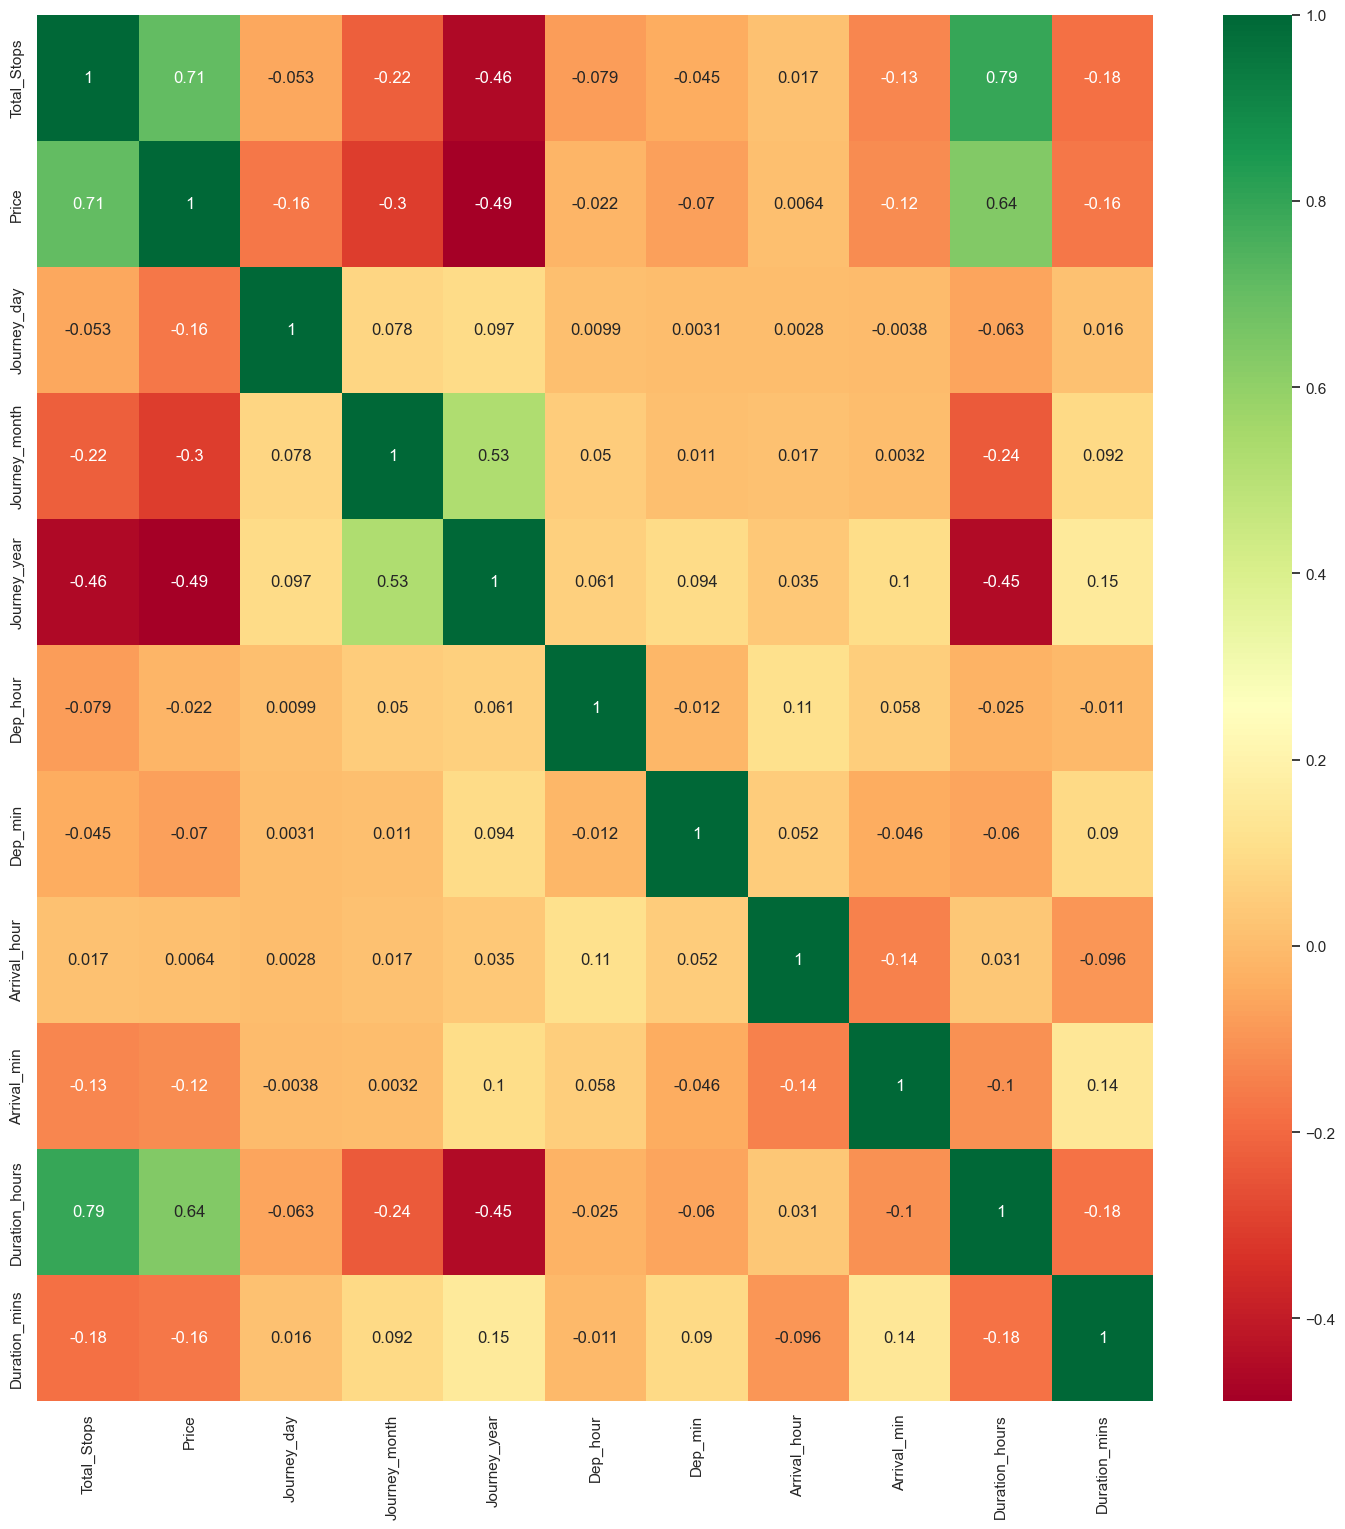

'\nA correlation value of 0.6 indicates a moderately strong positive linear relationship \nbetween the predictor variables and the price, suggesting that changes in the predictors \nare associated with a substantial proportion of the variation in price. \n\nA correlation value of 0.6 implies that approximately 36% (0.6^2 = 36%) of the variability \nin the price variable can be explained by the variability in the .predictor variables.\n\nA correlation value of -0.6 implies that approximately 36% of the variability in the price variable is \ninversely related to the variability in the predictor variable\n X is independent and y is dependent in our case. \n'

In [46]:
# Finds correlation between Independent and dependent attributes

plt.figure(figsize = (18,18))
sns.heatmap(train_data.corr(), annot = True, cmap = "RdYlGn")

plt.show()
'''
A correlation value of 0.6 indicates a moderately strong positive linear relationship 
between the predictor variables and the price, suggesting that changes in the predictors 
are associated with a substantial proportion of the variation in price. 

A correlation value of 0.6 implies that approximately 36% (0.6^2 = 36%) of the variability 
in the price variable can be explained by the variability in the .predictor variables.

A correlation value of -0.6 implies that approximately 36% of the variability in the price variable is 
inversely related to the variability in the predictor variable
 X is independent and y is dependent in our case. 
'''

C:\Users\DELL\AppData\Local\Temp\ipykernel_12812\3228867913.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train_data.corr(), annot = True, cmap = "RdYlGn")


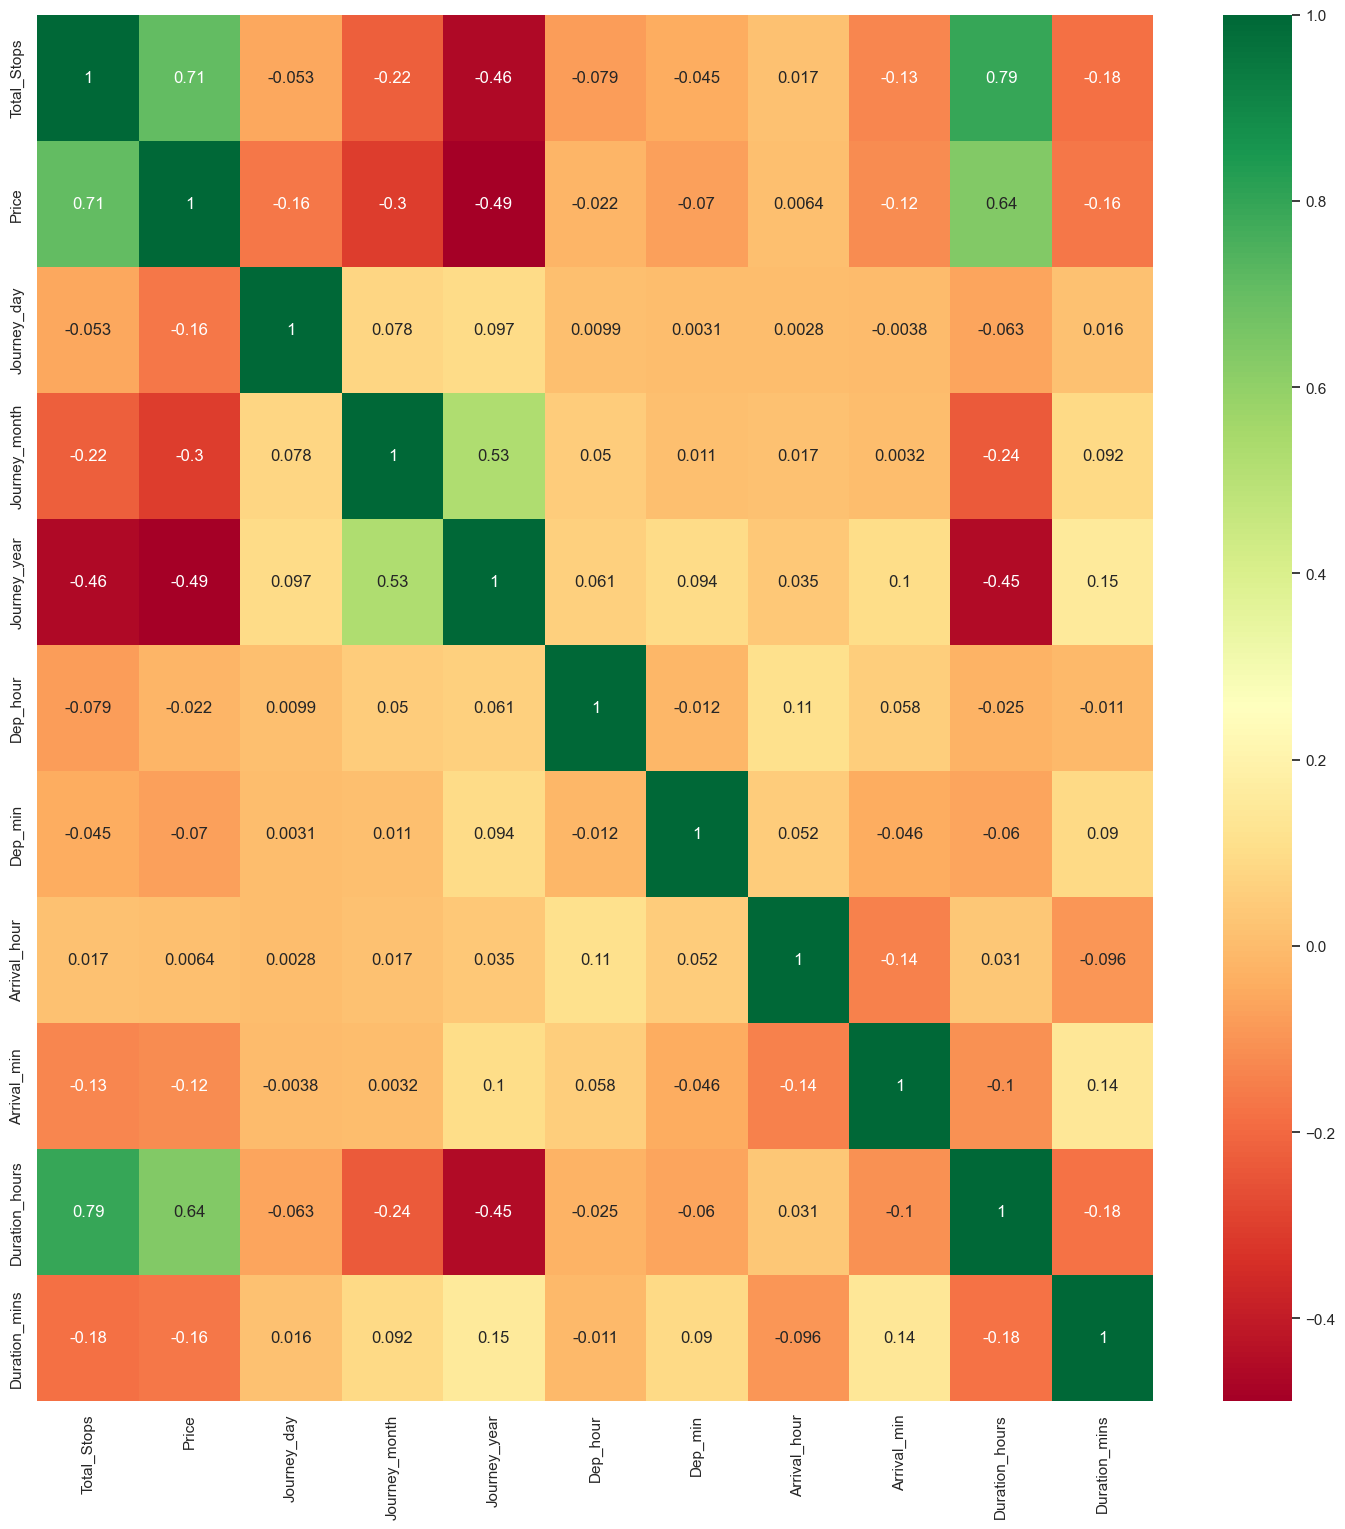

In [47]:
# Finds correlation between Independent and dependent attributes

plt.figure(figsize = (18,18))
sns.heatmap(train_data.corr(), annot = True, cmap = "RdYlGn")

plt.show()

In [59]:
# Importing necessary libraries
import numpy as np
import pandas as pd

# Definition of the SimpleDecisionTreeRegressor class
class SimpleDecisionTreeRegressor:
    # Initialization method to set initial values
    def __init__(self):
        # Initializing the tree attribute to None
        self.tree = None
        # Initializing the feature_importances_ attribute to None
        self.feature_importances_ = None

    # Static method to calculate the mean squared error of a set of values y
    @staticmethod
    def mean_squared_error(y):
        # If the length of y is 0, return 0.0 to avoid division by zero
        if len(y) == 0:
            return 0.0
        # Calculate the mean of y
        mean = np.mean(y)
        # Calculate the mean squared error
        return np.mean((y - mean) ** 2)

    # Method to calculate the mean squared error for a given set of y values
    def get_mse(self, y):
        return self.mean_squared_error(y)

    # Method to find the best feature and value to split the data based on minimizing weighted mean squared error
    def best_split(self, X, y):
        # Get the list of feature names
        features = list(X.columns)
        # Initialize variables to store the best feature, value, and mean squared error
        best_feature, best_value, best_mse = None, None, float('inf')

        # Iterate over features
        for feature in features:
            # Get unique values for the current feature and sort them
            values = sorted(X[feature].unique())
            # Iterate over values
            for value in values:
                # Create boolean masks for left and right subsets of the data
                left_mask = X[feature] <= value
                right_mask = ~left_mask

                # Get y values for left and right subsets
                y_left = y[left_mask]
                y_right = y[right_mask]

                # Calculate mean squared errors for left and right subsets
                mse_left = self.get_mse(y_left)
                mse_right = self.get_mse(y_right)

                # Calculate the number of samples in left and right subsets
                n_left = len(y_left)
                n_right = len(y_right)

                # Calculate weights for left and right subsets
                w_left = n_left / (n_left + n_right)
                w_right = n_right / (n_left + n_right)

                # Calculate the weighted mean squared error
                w_mse = w_left * mse_left + w_right * mse_right

                # Update best feature, value, and mean squared error if current split is better
                if w_mse < best_mse:
                    best_feature, best_value, best_mse = feature, value, w_mse

        # Return the best feature, value, and mean squared error
        return best_feature, best_value

    # Method to recursively grow the decision tree
    def grow_tree(self, X, y, depth, min_samples_split):
        # Check stopping conditions: if depth is 0 or the number of samples is less than the minimum required for a split
        if depth == 0 or len(y) < min_samples_split:
            # Return the mean of y if it is not empty, otherwise return None
            return np.mean(y) if not y.empty else None

        # Find the best feature and value to split the data
        best_feature, best_value = self.best_split(X, y)

        # If no valid split is found, return the mean of y if it is not empty, otherwise return None
        if best_feature is None:
            return np.mean(y) if not y.empty else None

        # Create boolean masks for left and right subsets of the data
        left_mask = X[best_feature] <= best_value
        right_mask = ~left_mask

        # Recursively grow the left and right subtrees
        left_subtree = self.grow_tree(X[left_mask], y[left_mask], depth - 1, min_samples_split)
        right_subtree = self.grow_tree(X[right_mask], y[right_mask], depth - 1, min_samples_split)

        # Return a tuple representing the current node in the tree
        return (best_feature, best_value, left_subtree, right_subtree)

    # Method to fit the decision tree to the training data
    def fit(self, X, y, max_depth=None, min_samples_split=None):
        # Grow the tree using the training data
        self.tree = self.grow_tree(X, y, max_depth, min_samples_split)
        # Calculate and store feature importances
        self.feature_importances_ = self.calculate_feature_importances(X, y)

    # Method to calculate feature importances based on mean squared error
    def calculate_feature_importances(self, X, y):
        # Initialize a list to store feature importances
        mse_values = []
        # Iterate over features
        for feature in X.columns:
            # Get unique values for the current feature
            unique_values = X[feature].unique()
            # print(feature) all are column in X 
            #print(X[feature]) #row value pair 101:2
            # print(unique values) array of each unique value in X e.g. stop [0,1,2,3,4]
            
            # Initialize a variable to store the sum of mean squared errors for the feature
            mse_sum = 0
            
            # Iterate over unique values
            for value in unique_values:
                # Create a boolean mask for the current value
                value_mask = X[feature] == value
                
                # print(value_mask) 101 : True, value=2 , X[feature]=101:2
              
                # Get y values for the current value
                y_values = y[value_mask]  
                # print(y_values) 101 price value to y_values
                
               
                # Calculate mean squared error for the current value and weight it by the number of samples
                mse = self.get_mse(y_values) * len(y_values) / len(y)
                # Add the weighted mean squared error to the sum
                mse_sum += mse
            # Append the feature and its total weighted mean squared error to the list
            mse_values.append((feature, mse_sum))
        # Sort feature importances in ascending order
        mse_values.sort(key=lambda x: x[1])
        # print(mse_values) ('Total_Stops', 10919834.762078494)
        # Return the sorted feature importances
        return mse_values

    # Method to predict the output for a single observation using the trained tree
    # Method to predict the output for a single observation using the trained tree
    def predict_obs(self, x, tree):
            # Check if the current node is an internal node
        if isinstance(tree, tuple):
                # Unpack the tuple representing the internal node
            feature, value, left_subtree, right_subtree = tree
                # Make a recursive call based on the split condition
            if x[feature] <= value:
                 return float(self.predict_obs(x, left_subtree))  # Convert to float
            else:
                return float(self.predict_obs(x, right_subtree))  # Convert to float
        else:  # Leaf node
            # Return the value associated with the leaf node, converted to float
            return float(tree)

#     def predict_obs(self, x, tree):
#         # Check if the current node is an internal node
#         if isinstance(tree, tuple):
#             # Unpack the tuple representing the internal node
#             feature, value, left_subtree, right_subtree = tree
#             # Make a recursive call based on the split condition
#             if x[feature] <= value:
#                 return self.predict_obs(x, left_subtree)
#             else:
#                 return self.predict_obs(x, right_subtree)
#         else:  # Leaf node
#             # Return the value associated with the leaf node
#             return tree

    # Method to predict the outputs for a set of observations using the trained tree
    def predict(self, X):
        # Check if the tree has been trained
        if self.tree is None:
            raise ValueError("The model has not been trained yet. Call fit() first.")
        # Initialize a list to store predictions
        predictions = []
        # Iterate over rows of the input DataFrame
        for _, x in X.iterrows():
            #_ is throw away character as we donot need the index 
            # Make a prediction for each observation and append it to the list
            prediction = self.predict_obs(x, self.tree)
            predictions.append(prediction)
        # Return the list of predictions
        return predictions
    
    def k_fold_cross_validation_DT(self, X, y, k=5):
        count = 1
        kf = KFold(n_splits=k, shuffle=True, random_state=42)
        r2_scores, mse_scores, mae_scores = [], [], []

        for train_index, test_index in kf.split(X):
            X_train, X_test = X.iloc[train_index], X.iloc[test_index]
            y_train, y_test = y.iloc[train_index], y.iloc[test_index]

            # Create an instance of SimpleRandomForestRegressor and fit the model
            simple_dt_regressor = SimpleDecisionTreeRegressor()
            simple_dt_regressor.fit(X_train, y_train, max_depth=10, min_samples_split=10)

            # Make predictions on the test data
            predictions_dt = simple_dt_regressor.predict(X_test)

            # Calculate metrics
            accuracy, precision, recall
            r2_scores.append(r2_score(y_test, predictions_dt))
            mse_scores.append(mean_squared_error(y_test, predictions_dt))
            mae_scores.append(mean_absolute_error(y_test, predictions_dt))
            
            print(f"Sakyo  hai {k}")
            count = count +1
        avg_r2 = np.mean(r2_scores)
        avg_mse = np.mean(mse_scores)
        avg_mae = np.mean(mae_scores)

        print(f'Average R-squared: {avg_r2:.4f}')
        print(f'Average MSE: {avg_mse:.4f}')
        print(f'Average MAE: {avg_mae:.4f}')


In [60]:
import time
#using the simpleDecisionTreeRegressor to deal with the predicted value and claulate MSE,MAE, and cofficient of determination
#The actual value vs predicted value plot is also here 


from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)



# Instantiate the SimpleDecisionTreeRegressor model
simple_tree_regressor = SimpleDecisionTreeRegressor()

# Fit the model on the training data
simple_tree_regressor.fit(X_train, y_train, max_depth=10, min_samples_split=20)


start_time = time.time()

# Make predictions on the test data
predictions = simple_tree_regressor.predict(X_test)

end_time = time.time()
# print(predictions)

# Display the results


# Calculate the mean squared error as a measure of performance
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')


# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, predictions)
print(f'Mean Absolute Error (MAE): {mae}')

# Calculate R-squared
r_squared = r2_score(y_test, predictions)
print(f'R-squared: {r_squared}')

# Calculate Root Mean Squared Error (RMSE)
rmse = mean_squared_error(y_test, predictions, squared=False)
print(f'Root Mean Squared Error : {rmse}')
dv_range = np.max(y) - np.min(y) # range of the dependent variable 
# Calculate NRMSE
nrmse = rmse / dv_range

print(f'NRMSE: {nrmse}')

execution_time = end_time - start_time
print(f"Execution time: {execution_time:.2f} seconds")



(9082, 51)
(3893, 51)
(9082,)
(3893,)
Mean Squared Error: 33021.64224711758
Mean Absolute Error (MAE): 109.84932623138906
R-squared: 0.826897476540014
Root Mean Squared Error : 181.71857980712258
NRMSE: 0.036343715961424515
Execution time: 0.31 seconds


In [61]:
simple_tree_regressor.k_fold_cross_validation_DT(X_train, y_train, k=5)

Average R-squared: 0.8098
Average MSE: 35886.1364
Average MAE: 107.8227


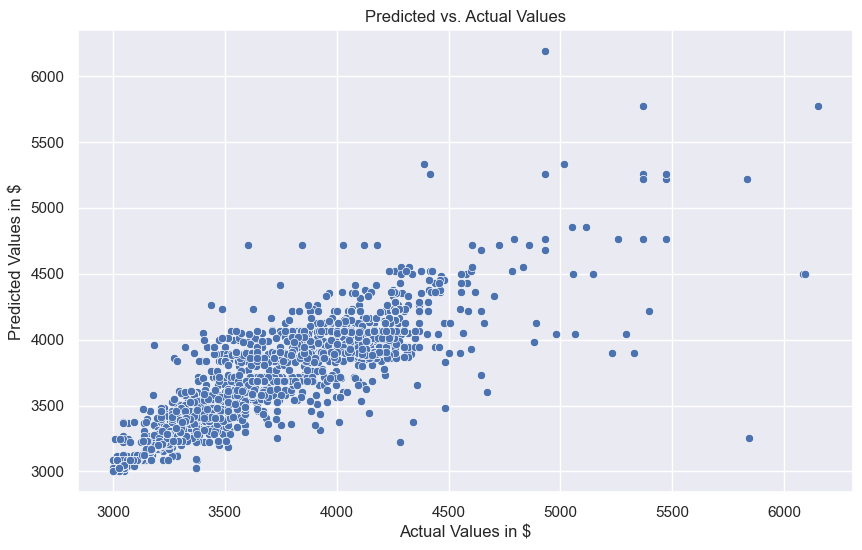

In [50]:
# Plot predicted vs. actual values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=predictions)
plt.title('Predicted vs. Actual Values')
plt.xlabel('Actual Values in $')
plt.ylabel('Predicted Values in $')
plt.show()


In [71]:
import time
class SimpleRandomForestRegressor:
    
    #At first the initialization is done,n_estimators is the paramater for number of trees
    def __init__(self, n_estimators=100, max_depth=None, min_samples_split=2):
        self.n_estimators = n_estimators
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.trees = []  #To store the individual decision tree

    def mean_squared_error(self, y):
        if len(y) == 0:
            return 0.0
        mean = np.mean(y)
        return np.mean((y - mean) ** 2)

    def get_mse(self, y):
        return self.mean_squared_error(y)

    def bootstrap_sample(self, X, y):
        indices = np.random.choice(len(X), len(X), replace=True) #create a bootstrap sample for random subset of datas
        X_sample, y_sample = X.iloc[indices].reset_index(drop=True), y.iloc[indices].reset_index(drop=True)
        return X_sample, y_sample #new sample 

    def train_tree(self, X, y):
        tree = SimpleDecisionTreeRegressor()
        tree.fit(X, y, max_depth=self.max_depth, min_samples_split=self.min_samples_split)
        return tree #multiple decision tree 

    def fit(self, X, y):
        print("Starting Random Forest fitting...")
        for _ in range(self.n_estimators):
            print(f"Fitting tree {_ + 1}...")
            X_sample, y_sample = self.bootstrap_sample(X, y)
            tree = self.train_tree(X_sample, y_sample)
            print(f"Tree {_ + 1} fitted.")
            self.trees.append(tree)
        print("Random Forest fitting complete.")



    def predict(self, X):
        predictions = np.zeros(len(X))

        for tree in self.trees:
            # Reset the index of the input DataFrame to avoid KeyError
            X_reset_index = X.reset_index(drop=True)

            tree_predictions = np.array([tree.predict_obs(x, tree.tree) for _, x in X_reset_index.iterrows()])
            predictions += tree_predictions

        return predictions / self.n_estimators
    def k_fold_cross_validation(self, X, y, k=5):
        kf = KFold(n_splits=k, shuffle=True, random_state=42)
        r2_scores, mse_scores, mae_scores = [], [], []

        for train_index, test_index in kf.split(X):
            X_train, X_test = X.iloc[train_index], X.iloc[test_index]
            y_train, y_test = y.iloc[train_index], y.iloc[test_index]

            # Create an instance of SimpleRandomForestRegressor and fit the model
            simple_rf_regressor = SimpleRandomForestRegressor(n_estimators=10, max_depth=10, min_samples_split=10)
            simple_rf_regressor.fit(X_train, y_train)

            # Make predictions on the test data
            predictions_rf = simple_rf_regressor.predict(X_test)

            # Calculate metrics
            r2_scores.append(r2_score(y_test, predictions_rf))
            mse_scores.append(mean_squared_error(y_test, predictions_rf))
            mae_scores.append(mean_absolute_error(y_test, predictions_rf))

        # Calculate average metrics across folds
        avg_r2 = np.mean(r2_scores)
        avg_mse = np.mean(mse_scores)
        avg_mae = np.mean(mae_scores)

        print(f'Average R-squared: {avg_r2:.4f}')
        print(f'Average MSE: {avg_mse:.4f}')
        print(f'Average MAE: {avg_mae:.4f}')


# Assuming you have X_train and y_train from your previous code
print("Shape of X_test:", X_test.shape)

print("Shape of y_test:", y_test.shape)

# Create an instance of SimpleRandomForestRegressor and fit the model
simple_rf_regressor = SimpleRandomForestRegressor(n_estimators=10, max_depth=10, min_samples_split=10)
start_time = time.time()
# print("Fitting Random Forest...")
simple_rf_regressor.fit(X_train, y_train)
# print("Random Forest fitting complete.")

end_time = time.time()

# Make predictions on the test data
print("Making predictions...")
predictions_rf = simple_rf_regressor.predict(X_test)
#print("Shape of predictions_rf:", predictions_rf.shape)
# print(predictions_rf)

# Calculate the mean squared error as a measure of performance
mse_rf = mean_squared_error(y_test, predictions_rf)
print(f'Random Forest Mean Squared Error: {mse_rf}')

# Calculate Mean Absolute Error (MAE)
mae_rf = mean_absolute_error(y_test, predictions_rf)
print(f'Random Forest Mean Absolute Error (MAE): {mae_rf}')

# Calculate R-squared
r_squared_rf = r2_score(y_test, predictions_rf)
print(f'Random Forest R-squared: {r_squared_rf}')

# Calculate Root Mean Squared Error (RMSE)
rmse = mean_squared_error(y_test, predictions_rf, squared=False)
print(f'Root Mean Squared Error (RMSE): {rmse}')

# Calculate the execution time
execution_time = end_time - start_time
print(f"Execution time: {execution_time:.2f} seconds")




Shape of X_test: (3893, 51)
Shape of y_test: (3893,)
Starting Random Forest fitting...
Fitting tree 1...


KeyboardInterrupt: 

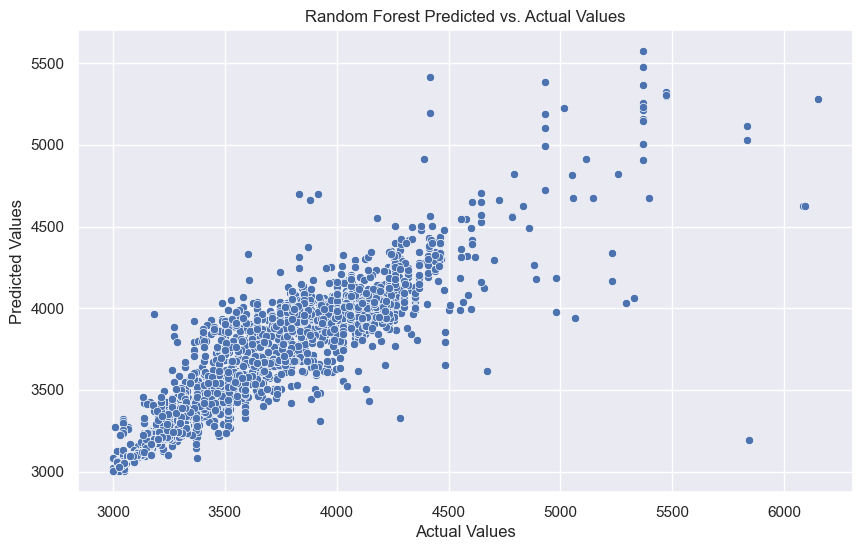

In [69]:
# Plot predicted vs. actual values for Random Forest
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=predictions_rf)
plt.title('Random Forest Predicted vs. Actual Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

In [72]:

# Example usage:
# Assuming you have X_train and y_train from your previous code
simple_rf_regressor = SimpleRandomForestRegressor(n_estimators=10, max_depth=10, min_samples_split=10)
simple_rf_regressor.k_fold_cross_validation(X_train, y_train, k=5)

Starting Random Forest fitting...
Fitting tree 1...
Tree 1 fitted.
Fitting tree 2...
Tree 2 fitted.
Fitting tree 3...
Tree 3 fitted.
Fitting tree 4...
Tree 4 fitted.
Fitting tree 5...
Tree 5 fitted.
Fitting tree 6...
Tree 6 fitted.
Fitting tree 7...
Tree 7 fitted.
Fitting tree 8...
Tree 8 fitted.
Fitting tree 9...
Tree 9 fitted.
Fitting tree 10...
Tree 10 fitted.
Random Forest fitting complete.
Starting Random Forest fitting...
Fitting tree 1...
Tree 1 fitted.
Fitting tree 2...
Tree 2 fitted.
Fitting tree 3...
Tree 3 fitted.
Fitting tree 4...
Tree 4 fitted.
Fitting tree 5...
Tree 5 fitted.
Fitting tree 6...
Tree 6 fitted.
Fitting tree 7...
Tree 7 fitted.
Fitting tree 8...
Tree 8 fitted.
Fitting tree 9...
Tree 9 fitted.
Fitting tree 10...
Tree 10 fitted.
Random Forest fitting complete.
Starting Random Forest fitting...
Fitting tree 1...
Tree 1 fitted.
Fitting tree 2...
Tree 2 fitted.
Fitting tree 3...
Tree 3 fitted.
Fitting tree 4...
Tree 4 fitted.
Fitting tree 5...
Tree 5 fitted.
Fitti

In [53]:
# Calculate the range of the dependent variable
print(f'RMSE: {rmse}')

dv_range = np.max(y) - np.min(y)

print(f'Dependent Variable Range: {dv_range}')
# Calculate NRMSE
nrmse = rmse / dv_range

print(f'NRMSE: {nrmse}')

errorPercentage = nrmse * 100
print(f"The error percentage is: {errorPercentage:.2f}%")


RMSE: 169.94037248325876
Dependent Variable Range: 5000.0
NRMSE: 0.033988074496651755
The error percentage is: 3.40%


In [54]:
# chisquaire, ANOVA, Corellation Test to research 
from scipy.stats import ttest_rel



residuals_rf = y_test - predictions_rf #randomforest 
residuals_dt = y_test - predictions #decisiontree 

# Assuming you have residuals from another model (replace this line with actual residuals)
# residuals_other_model = ...

# Perform paired t-test
t_statistic, p_value = ttest_rel(residuals_rf, residuals_dt)



# Print the result
print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")

'''
    A negative t-statistic suggests that the mean of the first group 
    (random forest residuals) is less than the mean of the second group (decision tree residuals).
'''

'''The p-value of 0.1353 is greater than a common significance level of 0.05.
This suggests that there is not enough evidence to reject the null hypothesis that there 
is no significant difference between the means of the random forest and decision tree residuals.
In simpler terms, based on the paired t-test, there is no strong statistical evidence to suggest a
significant difference between the residuals of the random forest and decision tree models.
'''

T-statistic: -2.2905875179817885
P-value: 0.022040509769993596


'The p-value of 0.1353 is greater than a common significance level of 0.05.\nThis suggests that there is not enough evidence to reject the null hypothesis that there \nis no significant difference between the means of the random forest and decision tree residuals.\nIn simpler terms, based on the paired t-test, there is no strong statistical evidence to suggest a\nsignificant difference between the residuals of the random forest and decision tree models.\n'

In [63]:
import numpy as np
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import make_scorer
# Assuming X and y are your feature matrix and target variable

# Number of splits (folds) for cross-validation
n_splits = 5
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
scoring_r2 = make_scorer(r2_score)

# Initialize your machine learning model (decision_tree_regressor is already instantiated)
cross_val_results_r2 = cross_val_score(simple_rf_regressor, X, y, cv=kf, scoring=scoring_r2)
# cross_val_results_MSE = cross_val_score(simple_rf_regressor, X, y, cv=kf, scoring='neg_mean_squared_error')
# cross_val_results_MAE = cross_val_score(simple_rf_regressor, X, y, cv=kf, scoring='neg_mean_absolute_error')

# Display the results
print(f'Cross-validated R-squared: {cross_val_results_r2.mean()}')
# print("*"*25)
# print(f'Cross-validated MSE: {cross_val_results_MSE.mean()}')
# print("*"*25)
# print(f'Cross-validated MAE: {cross_val_results_MAE.mean()}')
# print("*"*25)




TypeError: Cannot clone object '<__main__.SimpleRandomForestRegressor object at 0x0000029B80C1C8D0>' (type <class '__main__.SimpleRandomForestRegressor'>): it does not seem to be a scikit-learn estimator as it does not implement a 'get_params' method.

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [75]:
import pickle

# Assuming you have already trained your SimpleRandomForestRegressor
# and stored it in the variable simple_rf_regressor

# Save the trained model to a file
with open('random_forest_model.pkl', 'wb') as model_file:
    pickle.dump(simple_rf_regressor, model_file)